<a href="https://colab.research.google.com/github/christofferaakre/machine-learning/blob/master/projects/mnist/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# mnist <!-- omit in toc -->
[mnist](http://yann.lecun.com/exdb/mnist/) 
is a database of images of handwritten digits, in particular, a set of 60,000 training examples and 10,000 test examples.

## goal of this project
Write a neural network that can recognise the handwritten digits from the `mnist` dataset.

## results 
The neural network was trained on `60 000` training examples, and then tested on `10 000` more examples. I trained for 100 epochs using SGD with a batch size of `100`, which took approximately 5-10 minutes using the free GPU acceleration in Google Colab. The results were:
```
Correct: 9873 Incorrect: 127
Accuracy: 0.9872999787330627
```
These are very good results in my opinion, and were achieved with very little effort. I got these results the first time I trained the network, I didn't even have to tweak anything.
## input data
`28x28` images representing handwritten digits from `0-9`, represented as a `1x28x28` tensor since the images are greyscale images.
the images were accessed using `torchvision.datasets.MNIST`
## output
A `10D vector` with probabilities for the given digit being each of the 10 digits for `0-9`. For example, if a particular input digit is `3`, we would want a perfect neural network to return 
```
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
``` 
and then it would have zero error.

## model
1. `1x28x28` input --> `3x3` conv (`1` in, `6` out) --> `26x26`
2. `relu`
3. `26x26` --> `3x3` conv (`6` in, `16` out) --> `24x24`
4. `relu`
5. `Linear` (`16 * 24 * 24` in, `120` out)
6. `relu`
7. `Linear` (`120` in, `84` out)
8. `relu`
9. `Linear` (`84` in, `10` out)
10. `MSELoss`

In [90]:
import torch
import torch.nn as nn
import torchvision.datasets
import torchvision.transforms as transforms

transform = transforms.Compose([
              transforms.ToTensor()
])

batch_size = 100

training_data= torchvision.datasets.MNIST(root='./mnist',
                                          train=True,
                                          download=True,
                                          transform=transform
                                          )

training_loader = torch.utils.data.DataLoader(dataset=training_data,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              )


test_data = torchvision.datasets.MNIST(root='./mnist',
                                       train=False,
                                       download=True,
                                       transform=transform
                                       )

test_loader = torch.utils.data.DataLoader(dataset=test_data,
                                          batch_size=batch_size,
                                          shuffle=True
                                          )


In [91]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


tensor(1)


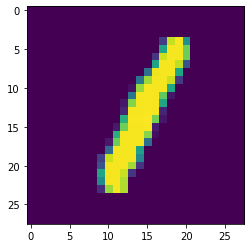

In [92]:
# showing images to check the dataset was imported
# correctly
import matplotlib.pyplot as plt
plt.imshow(images[0][0].numpy())
print(labels[0])
plt.show()

In [93]:
import torch.nn.functional as F
import torch.optim as optim
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=1,
                           out_channels=6,
                           kernel_size=(3, 3)
                           )
    self.conv2 = nn.Conv2d(in_channels=6,
                           out_channels=16,
                           kernel_size=(3, 3)
                           )
    
    self.layer1 = nn.Linear(16 * 24 * 24, 120)
    self.layer2 = nn.Linear(120, 84)
    self.layer3 = nn.Linear(84, 10)

  def forward(self, x):
     x = F.relu(self.conv1(x))
     x = F.relu(self.conv2(x))
     x = x.view(-1, 16 * 24 * 24)
     x = F.relu(self.layer1(x))
     x = F.relu(self.layer2(x))
     x = self.layer3(x)
     return x

In [94]:
net = Net()
optimizer = optim.SGD(params=net.parameters(), lr=0.1)
criterion = nn.MSELoss()
PATH = './mnist_net_pth'
print(PATH)
print(net)
print(optimizer)

./mnist_net_pth
Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (layer1): Linear(in_features=9216, out_features=120, bias=True)
  (layer2): Linear(in_features=120, out_features=84, bias=True)
  (layer3): Linear(in_features=84, out_features=10, bias=True)
)
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.1
    momentum: 0
    nesterov: False
    weight_decay: 0
)


In [95]:
# uncomment this cell and run it once to train, then
# comment it out again so you don't need to train it each time


# train on GPU
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# print(device)
# net.to(device)
# 
# 
# epochs = 100
# n_batches = len(training_data) // batch_size
# 
# for epoch in range(epochs):
#   total_loss = 0
#   for i, data in enumerate(training_loader):
#     optimizer.zero_grad()
#     images, labels = data[0].to(device), data[1].to(device)
#     targets = F.one_hot(labels, num_classes=10)
#     outputs = net(images)
#     _, pred = outputs.max(1)
#     loss = criterion(outputs, targets.float())
#     loss.backward()
#     optimizer.step()
#     total_loss += loss
#   avg_loss = total_loss / batch_size
#   for g in optimizer.param_groups:
#     g['lr'] *= 0.99
#   print(f'Epoch: {epoch + 1} Loss: {avg_loss}') 
# 
# torch.save(net.state_dict(), PATH)
# print('training finished, and state saved')

cuda:0
Epoch: 1 Loss: 0.2519228458404541
Epoch: 2 Loss: 0.11329012364149094
Epoch: 3 Loss: 0.09160222113132477
Epoch: 4 Loss: 0.07978638261556625
Epoch: 5 Loss: 0.07158755511045456
Epoch: 6 Loss: 0.06590541452169418
Epoch: 7 Loss: 0.061274755746126175
Epoch: 8 Loss: 0.057786040008068085
Epoch: 9 Loss: 0.05445444956421852
Epoch: 10 Loss: 0.05190350487828255
Epoch: 11 Loss: 0.04973096400499344
Epoch: 12 Loss: 0.04765711724758148
Epoch: 13 Loss: 0.045723073184490204
Epoch: 14 Loss: 0.04411644488573074
Epoch: 15 Loss: 0.04270824417471886
Epoch: 16 Loss: 0.041341252624988556
Epoch: 17 Loss: 0.03988884016871452
Epoch: 18 Loss: 0.03869852051138878
Epoch: 19 Loss: 0.03749151900410652
Epoch: 20 Loss: 0.03638068214058876
Epoch: 21 Loss: 0.03534592315554619
Epoch: 22 Loss: 0.034357476979494095
Epoch: 23 Loss: 0.03354530408978462
Epoch: 24 Loss: 0.03251373767852783
Epoch: 25 Loss: 0.03167903423309326
Epoch: 26 Loss: 0.030954986810684204
Epoch: 27 Loss: 0.030176831409335136
Epoch: 28 Loss: 0.029358

In [96]:
# loading saved state
net = Net()
net.load_state_dict(torch.load(PATH))

# Testing the neural network after training
test_correct = 0
test_total = 0

for i, data in enumerate(test_loader):
  images, labels = data
  outputs = net(images)
  _, pred = outputs.max(1)
  target = F.one_hot(labels, num_classes=10)
  test_total += batch_size
  correct = (pred == labels).sum()
  test_correct += correct

print(f'Correct: {test_correct} Incorrect: {test_total - test_correct}')
print(f'Accuracy: {test_correct / test_total}')  

Correct: 9873 Incorrect: 127
Accuracy: 0.9872999787330627
